In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import loadtxt
Data = []
Deriv= [] 
Squaring = []
smoothing=[]
Autocorr=[]
flag=0


# Save The Data in an array

In [2]:
def SignalData_into_array(File_Name):
    global flag
    Input = loadtxt(File_Name, comments="#", delimiter=",", unpack=False)
    for i in range (0,len(Input)):
        Data.append(float(Input[i]))
    if(File_Name=="Data1.txt"):
        flag=1
    plt.plot(Data)
    plt.title("Orignal Signal",fontsize=30)
    plt.show()
  
        

# Derivative Calculation

In [3]:
def Derivative():
    global Data 
    for i in range (2,len(Data)-2):
        Deriv.append(((1/8)*512)*(-Data[i-2]-2*Data[i-1]+2*Data[i+1]+Data[i+2]))
    plt.plot(Deriv)
    plt.title("Derivative",fontsize=30)
    plt.show()
    
    

# Square of the signal

In [4]:
def Squar():
    global Deriv
    global Squaring
    for i in range (0,len(Deriv)):
        Squaring.append((Deriv[i]**2))
    plt.plot(Squaring) 
    plt.title("Squared Signal",fontsize=30)
    plt.show()
    

# Smoothing of the Signal

In [5]:
def smooth():
    for i in range (0,len(Squaring)):
        sum=0
        if i<31:
            for j in range (0,i):
            
                sum+=Squaring[j]
            if i!=0:
                smoothing.append(sum/i)
            else:
                smoothing.append(sum)
        else:
            for k in range (i-31,i):
                sum+=Squaring[k]
            smoothing.append(sum/31)
    plt.plot(smoothing[:2000])
    plt.title("Smoothed Signal",fontsize=30)
    plt.show()
    
            
    

# Autocorrelation of the signal

In [6]:
def Autocorrelation():
    global smoothing
    global flag
    for m in range (0,len(smoothing)):
        Autocorr.append(0)
        for i in range (0,len(smoothing)):
            Autocorr[m]+=(smoothing[i]*smoothing[i-m])
    plt.plot(Autocorr)
    if flag==1:
        plt.title("AutoCorr1",fontsize=30)
    else:
        plt.title("AutoCorr2",fontsize=30)
    plt.show()
   
        
    

# Average Heart Rate Calculation

In [7]:
def Average_heart_rate():
    global Autocorr
    global value
    Max=0
    Part_of_Autocorr = Autocorr[100:500]
    Max=max(Part_of_Autocorr)
    value=0
    for i in range (0,len(Autocorr)):
        if(Autocorr[i]==Max):
            value=i
            break
    Avg_heart_rate= 60/(value*(1/512))
    print("Avg_heart_Rate= ",Avg_heart_rate)
    if flag==1:
        file = open ("Output1.txt","w")
        file.write("Avg_heart_Rate= "+ str (Avg_heart_rate))
        file.close()
    else:
        file = open ("Output2.txt","w")
        file.write("Avg_heart_Rate= "+ str (Avg_heart_rate))
        file.close() 
    Measure_Atrial_Fabr=1/value
    return Measure_Atrial_Fabr

# ECG Signal Analysis

In [8]:
def ECG_Analysis(File_Name):
    global Data 
    global Deriv 
    global Squaring
    global smoothing 
    global Autocorr
    global flag
    Data.clear()
    Deriv.clear()
    Squaring.clear()
    smoothing.clear()
    Autocorr.clear()
    flag=0
    SignalData_into_array(File_Name)
    Derivative()
    Squar()
    smooth()
    Autocorrelation()
    Measure_Atrial_Fibr=Average_heart_rate()
    print("Measure_Atrial_Fibr=1/index_of_Second_Highest_Beat=",Measure_Atrial_Fibr)
    if ((Measure_Atrial_Fibr>0.00195) and (Measure_Atrial_Fibr<0.00292)) :
        result= "NORMAL HEART RATE"
    else:
        result ="ATRIAL FIBRLLATION"
    return result
    if flag==1:
        file = open ("Output1_Atrial_Fibr.txt","w")
        file.write(" Atrial_Fibr_result= "+ str (Measure_Atrial_Fibr))
        file.close()
    else:
        file = open ("Output2_Atrial_Fibr.txt","w")
        file.write("Atrial_Fibr_result= "+ str (Measure_Atrial_Fibr))
        file.close() 
    

## Input for Problem 1

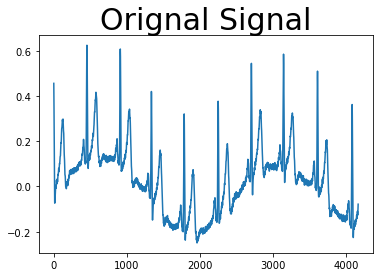

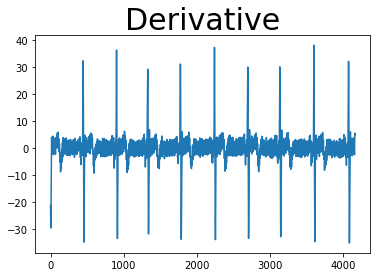

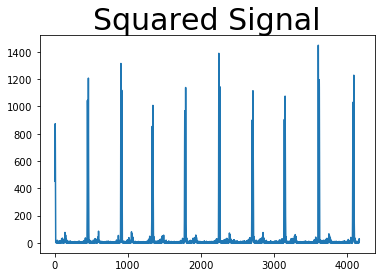

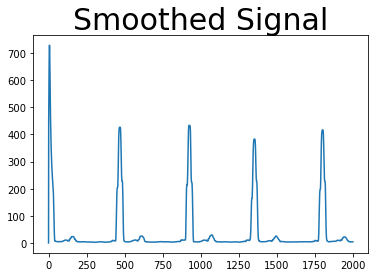

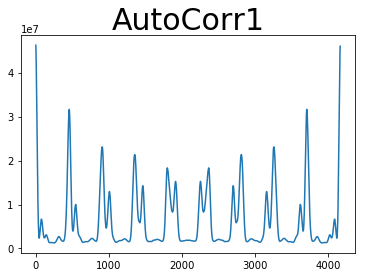

Avg_heart_Rate=  67.22100656455142
Measure_Atrial_Fibr=1/index_of_Second_Highest_Beat= 0.002188183807439825


'NORMAL HEART RATE'

In [9]:
#Apply on Problem1
ECG_Analysis("Data1.txt")

# Input for Problem 2

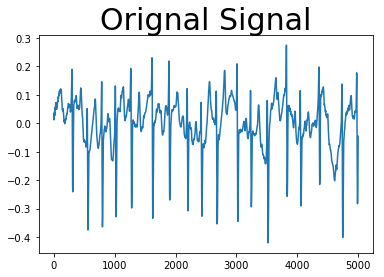

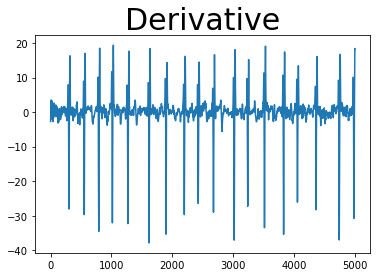

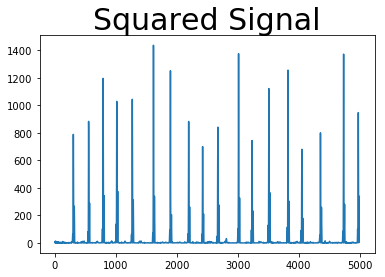

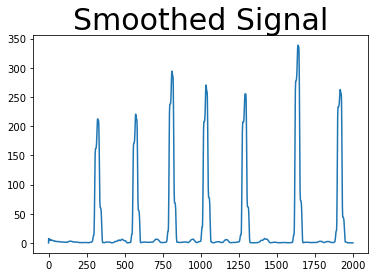

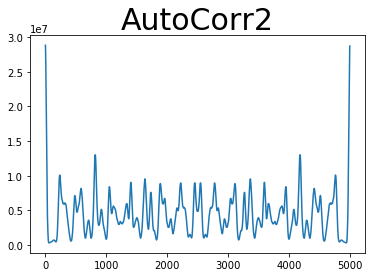

Avg_heart_Rate=  130.16949152542372
Measure_Atrial_Fibr=1/index_of_Second_Highest_Beat= 0.00423728813559322


'ATRIAL FIBRLLATION'

In [10]:
#Input for Problem 2
ECG_Analysis("Data2.txt")